## 26250 - ST115 Project Code

### Part 1: Introduction

This project aims to find out whether LSE departments should use Twitter to communicate with LSE students. During COVID-19, most events moved online, and most organisations had to improve their digital presence to adapt. Despite activities slowly returning to normal, having a strong digital presence is still extremely important. Therefore, exploring whether Twitter is a good social media platform to use to improve the department's digital presence is a topic worth exploring.

We can explore the statement above by carrying out an analysis similar to social media analytics. To find out whether Twitter is an adequate social media platform, we may want to answer these few questions:
1. What defines a successful Twitter account?
2. Does Twitter have an active audience that's worth maintaining?
3. Is it easy to grow on Twitter? Do tweets often get shared enough to grow a Twitter account?
4. Does a department need positive attention to be successful? Or can negative attention make the account successful too?

### Part 2: Data Collection

To answer the questions above, we have to collect some information about a variety of things for each department. For example, we could gather information like the number of followers, types of engagements, number of engagements, and the sentiments of replies and mentions for each account. Using different combinations of information, we can find out whether Twitter is an adequate social media platform.

We can collect all the information needed from Twitter itself. There are a few limitations to using Twitter API calls. For example, there are limits to the API calls we can make. More limitations will be explained as we extract data.

To start, we will call the list of departments at the LSE so we know which accounts to look for on Twitter.

In [1]:
from bs4 import BeautifulSoup
import requests
import json

In [2]:
url = "https://info.lse.ac.uk/staff/departments-and-institutes"
response = requests.get(url)
soup = BeautifulSoup(response.content, "lxml")

In [3]:
raw_list = soup.find_all('ul')

In [4]:
dept = []

for tag in raw_list:
    list_el = tag.text.strip()
    dept.append(list_el)

In [5]:
depts = dept[2:]
depts

['Department of Accounting\nDepartment of Anthropology\nData Science Institute\nDepartment of Economics\nDepartment of Economic History\nEuropean Institute\nDepartment of Finance\nFiroz Lalji Institute for Africa\nDepartment of Gender Studies\nDepartment of Geography and Environment\nDepartment of Government\nDepartment of Health Policy\nDepartment of International Development\nDepartment of International History\nInternational Inequalities Institute\nDepartment of International Relations\nLanguage Centre\nLSE Law School\nDepartment of Management\nMarshall Institute\nDepartment of Mathematics\nDepartment of Media and Communications\nDepartment of Methodology\nDepartment of Philosophy, Logic and Scientific Method\nDepartment of Psychological and Behavioural Science\nSchool of Public Policy (formerly Institute of Public Affairs)\nDepartment of Social Policy\nDepartment of Sociology\nDepartment of Statistics']

In [6]:
dept_list = depts[0].split("\n")
dept_list

['Department of Accounting',
 'Department of Anthropology',
 'Data Science Institute',
 'Department of Economics',
 'Department of Economic History',
 'European Institute',
 'Department of Finance',
 'Firoz Lalji Institute for Africa',
 'Department of Gender Studies',
 'Department of Geography and Environment',
 'Department of Government',
 'Department of Health Policy',
 'Department of International Development',
 'Department of International History',
 'International Inequalities Institute',
 'Department of International Relations',
 'Language Centre',
 'LSE Law School',
 'Department of Management',
 'Marshall Institute',
 'Department of Mathematics',
 'Department of Media and Communications',
 'Department of Methodology',
 'Department of Philosophy, Logic and Scientific Method',
 'Department of Psychological and Behavioural Science',
 'School of Public Policy (formerly Institute of Public Affairs)',
 'Department of Social Policy',
 'Department of Sociology',
 'Department of Statisti

In this project, I have only decided to look at LSE departments. Institutes tend to have a larger following and digital presence because they're more of a community than a department. It wouldn't be a fair comparison therefore we won't be looking into Institutes.

In [7]:
#Remove all elements in the list with the word Institute as we are looking only at Departments
indices = [dept_list.index("Data Science Institute"), dept_list.index("European Institute"), 
           dept_list.index("Firoz Lalji Institute for Africa"), dept_list.index("International Inequalities Institute"),
           dept_list.index("Marshall Institute"), 
           dept_list.index("School of Public Policy (formerly Institute of Public Affairs)")]

In [8]:
dept_list = [i for j, i in enumerate(dept_list) if j not in indices]
dept_list

['Department of Accounting',
 'Department of Anthropology',
 'Department of Economics',
 'Department of Economic History',
 'Department of Finance',
 'Department of Gender Studies',
 'Department of Geography and Environment',
 'Department of Government',
 'Department of Health Policy',
 'Department of International Development',
 'Department of International History',
 'Department of International Relations',
 'Language Centre',
 'LSE Law School',
 'Department of Management',
 'Department of Mathematics',
 'Department of Media and Communications',
 'Department of Methodology',
 'Department of Philosophy, Logic and Scientific Method',
 'Department of Psychological and Behavioural Science',
 'Department of Social Policy',
 'Department of Sociology',
 'Department of Statistics']

Based on the department list above, I've collected the list of Twitter usernames for each department manually because there isn't a compiled list of the department's Twitter handles.

In [9]:
usernames = ['LSE_Accounting', 'LSEAnthropology', 'LSEEcon',
            'LSEEcHist', 'LSEfinance', 'LSEGenderTweet', 'LSEGeography',
            'LSEGovernment', 'LSEHealthPolicy', 'LSE_ID', 'lsehistory',
            'LSEIRDept', 'lselangcentre', 'LSELaw', 'LSEManagement', 'LSEMaths',
            'MediaLSE', 'MethodologyLSE', 'LSEPhilosophy', 'LSEBehavioural', 
            'LSESocialPolicy', 'LSEsociology', 'LSEStatistics']

In [10]:
import pandas as pd

dept_usernames = pd.DataFrame({
    'Department': dept_list,
    'Twitter username': usernames
})

dept_usernames['Department'] = dept_usernames['Department'].str.replace('Department of ', '')
dept_usernames

,Department,Twitter username
0,Accounting,LSE_Accounting
1,Anthropology,LSEAnthropology
2,Economics,LSEEcon
3,Economic History,LSEEcHist
4,Finance,LSEfinance
5,Gender Studies,LSEGenderTweet
6,Geography and Environment,LSEGeography
7,Government,LSEGovernment
8,Health Policy,LSEHealthPolicy
9,International Development,LSE_ID


Next, we start identifying what kind of tweets we would like to look at for each department. We want to find out which department has better engagement overall and see what factors contribute to its success. The first thing we will look at is each department's follower counts. The next step is to find out the overall engagement using the metrics of likes, retweets, replies, and quotes. In the next step, we will look at comments (which may be limited). All the data analysis will only go back to the last 100 tweets posted by each account because this is the limit that Twitter allows.

Because of the restrictions of the Twitter developer account, the engagement counts are public metrics. If there were no restrictions, I would add more metrics like impression count, total views, and profile views.

In [11]:
with open('keys.json') as f:
    keys = json.load(f)

bearer_token = keys['twitter']['bearer_token']
headers = {
    'Authorization': f"Bearer {bearer_token}"
}

In [12]:
r = requests.get('https://api.twitter.com/2/users/by?usernames=LSE_Accounting,LSEAnthropology,LSEEcon,LSEEcHist,LSEfinance,LSEGenderTweet,LSEGeography,LSEGovernment,LSEHealthPolicy,LSE_ID,lsehistory,LSEIRDept,lselangcentre,LSELaw,LSEManagement,LSEMaths,MediaLSE,MethodologyLSE,LSEPhilosophy,LSEBehavioural,LSESocialPolicy,LSEsociology,LSEStatistics&user.fields=public_metrics', headers=headers)
r.text

'{"data":[{"public_metrics":{"followers_count":2517,"following_count":119,"tweet_count":495,"listed_count":0},"username":"LSE_Accounting","name":"LSE Accounting","id":"4900666161"},{"public_metrics":{"followers_count":6668,"following_count":95,"tweet_count":907,"listed_count":106},"username":"LSEAnthropology","name":"LSE Anthropology","id":"850888387"},{"public_metrics":{"followers_count":35704,"following_count":636,"tweet_count":10187,"listed_count":569},"username":"LSEEcon","name":"LSE Department of Economics","id":"1200727465"},{"public_metrics":{"followers_count":3893,"following_count":307,"tweet_count":1754,"listed_count":100},"username":"LSEEcHist","name":"LSE Economic History","id":"224639696"},{"public_metrics":{"followers_count":2479,"following_count":179,"tweet_count":605,"listed_count":51},"username":"LSEfinance","name":"LSE Finance","id":"972257048"},{"public_metrics":{"followers_count":19695,"following_count":2622,"tweet_count":7229,"listed_count":280},"username":"LSEGende

In [13]:
ids = json.loads(r.text)['data']

dept_ids = []; dept_followers = []; tweet_count = []

for i in range(0, len(ids)):
    idno = ids[i]['id']
    no_tweets = ids[i]['public_metrics']['tweet_count']
    followers = ids[i]['public_metrics']['followers_count']
    dept_ids.append(idno)
    dept_followers.append(followers)
    tweet_count.append(no_tweets)

dept_usernames['Tweet count'] = tweet_count
dept_usernames['Twitter ID'] = dept_ids
dept_usernames['Follower count'] = dept_followers

In [14]:
dept_usernames

,Department,Twitter username,Tweet count,Twitter ID,Follower count
0,Accounting,LSE_Accounting,495,4900666161,2517
1,Anthropology,LSEAnthropology,907,850888387,6668
2,Economics,LSEEcon,10187,1200727465,35704
3,Economic History,LSEEcHist,1754,224639696,3893
4,Finance,LSEfinance,605,972257048,2479
5,Gender Studies,LSEGenderTweet,7229,189090262,19695
6,Geography and Environment,LSEGeography,5331,240262055,12586
7,Government,LSEGovernment,8668,303823238,24749
8,Health Policy,LSEHealthPolicy,4551,472009727,7686
9,International Development,LSE_ID,5739,317018025,12176


Next, I will extract the number of engagements for the last 100 tweets of every LSE department on Twitter. I've chosen to use the last 100 tweets because of the limits. However, if there wasn't the restriction on the call limit, I would've retrieved tweets for all departments from January. Taking tweets based after a certain date would be more of a fair comparison.

In [148]:
#Accounting department
r = requests.get('https://api.twitter.com/2/users/4900666161/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
acc = json.loads(r.text)

acc_dept_tweets = acc['data']
acc_tweetid = []; acc_retweet = []; acc_reply = []; acc_like = []; acc_quote = []; dept = []; tweet_no = []

for i in range(0, len(acc_dept_tweets)):
    tweet_no.append(i)
    dept.append('Accounting')
    acc_tweetid.append(acc_dept_tweets[i]['id'])
    acc_retweet.append(acc_dept_tweets[i]['public_metrics']['retweet_count'])
    acc_reply.append(acc_dept_tweets[i]['public_metrics']['reply_count'])
    acc_like.append(acc_dept_tweets[i]['public_metrics']['like_count'])
    acc_quote.append(acc_dept_tweets[i]['public_metrics']['quote_count'])
    
acc_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': acc_tweetid,
    'Department': dept,
    'Retweet count': acc_retweet,
    'Reply count': acc_reply,
    'Like count': acc_like,
    'Quote count': acc_quote
})

In [149]:
#Anthropology department
r = requests.get('https://api.twitter.com/2/users/850888387/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
anth = json.loads(r.text)

anth_dept_tweets = anth['data']
anth_tweetid = []; anth_retweet = []; anth_reply = []; anth_like = []; anth_quote = []; dept = []; tweet_no = []

for i in range(0, len(anth_dept_tweets)):
    tweet_no.append(i)
    dept.append('Anthropology')
    anth_tweetid.append(anth_dept_tweets[i]['id'])
    anth_retweet.append(anth_dept_tweets[i]['public_metrics']['retweet_count'])
    anth_reply.append(anth_dept_tweets[i]['public_metrics']['reply_count'])
    anth_like.append(anth_dept_tweets[i]['public_metrics']['like_count'])
    anth_quote.append(anth_dept_tweets[i]['public_metrics']['quote_count'])
    
anth_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': anth_tweetid,
    'Department': dept,
    'Retweet count': anth_retweet,
    'Reply count': anth_reply,
    'Like count': anth_like,
    'Quote count': anth_quote
})

In [150]:
#Economics department
r = requests.get('https://api.twitter.com/2/users/1200727465/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
econ = json.loads(r.text)

econ_dept_tweets = econ['data']
econ_tweetid = []; econ_retweet = []; econ_reply = []; econ_like = []; econ_quote = []; dept = []; tweet_no = []

for i in range(0, len(econ_dept_tweets)):
    tweet_no.append(i)
    dept.append('Economics')
    econ_tweetid.append(econ_dept_tweets[i]['id'])
    econ_retweet.append(econ_dept_tweets[i]['public_metrics']['retweet_count'])
    econ_reply.append(econ_dept_tweets[i]['public_metrics']['reply_count'])
    econ_like.append(econ_dept_tweets[i]['public_metrics']['like_count'])
    econ_quote.append(econ_dept_tweets[i]['public_metrics']['quote_count'])
    
econ_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': econ_tweetid,
    'Department': dept,
    'Retweet count': econ_retweet,
    'Reply count': econ_reply,
    'Like count': econ_like,
    'Quote count': econ_quote
})

In [151]:
#Economics history department
r = requests.get('https://api.twitter.com/2/users/224639696/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
econhist = json.loads(r.text)

econhist_dept_tweets = econhist['data']
econhist_tweetid = []; econhist_retweet = []; econhist_reply = []; econhist_like = []; econhist_quote = []; dept = []; tweet_no = []

for i in range(0, len(econhist_dept_tweets)):
    tweet_no.append(i)
    dept.append('Economics History')
    econhist_tweetid.append(econhist_dept_tweets[i]['id'])
    econhist_retweet.append(econhist_dept_tweets[i]['public_metrics']['retweet_count'])
    econhist_reply.append(econhist_dept_tweets[i]['public_metrics']['reply_count'])
    econhist_like.append(econhist_dept_tweets[i]['public_metrics']['like_count'])
    econhist_quote.append(econhist_dept_tweets[i]['public_metrics']['quote_count'])
    
econhist_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': econhist_tweetid,
    'Department': dept,
    'Retweet count': econhist_retweet,
    'Reply count': econhist_reply,
    'Like count': econhist_like,
    'Quote count': econhist_quote
})

In [152]:
#Finance department
r = requests.get('https://api.twitter.com/2/users/972257048/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
finance = json.loads(r.text)

finance_dept_tweets = finance['data']
finance_tweetid = []; finance_retweet = []; finance_reply = []; finance_like = []; finance_quote = []; dept = []; tweet_no = []

for i in range(0, len(finance_dept_tweets)):
    tweet_no.append(i)
    dept.append('Finance')
    finance_tweetid.append(finance_dept_tweets[i]['id'])
    finance_retweet.append(finance_dept_tweets[i]['public_metrics']['retweet_count'])
    finance_reply.append(finance_dept_tweets[i]['public_metrics']['reply_count'])
    finance_like.append(finance_dept_tweets[i]['public_metrics']['like_count'])
    finance_quote.append(finance_dept_tweets[i]['public_metrics']['quote_count'])
    
finance_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': finance_tweetid,
    'Department': dept,
    'Retweet count': finance_retweet,
    'Reply count': finance_reply,
    'Like count': finance_like,
    'Quote count': finance_quote
})

In [153]:
#Gender studies department
r = requests.get('https://api.twitter.com/2/users/189090262/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
gender = json.loads(r.text)

gender_dept_tweets = gender['data']
gender_tweetid = []; gender_retweet = []; gender_reply = []; gender_like = []; gender_quote = []; dept = []; tweet_no = []

for i in range(0, len(gender_dept_tweets)):
    tweet_no.append(i)
    dept.append('Gender Studies')
    gender_tweetid.append(gender_dept_tweets[i]['id'])
    gender_retweet.append(gender_dept_tweets[i]['public_metrics']['retweet_count'])
    gender_reply.append(gender_dept_tweets[i]['public_metrics']['reply_count'])
    gender_like.append(gender_dept_tweets[i]['public_metrics']['like_count'])
    gender_quote.append(gender_dept_tweets[i]['public_metrics']['quote_count'])
    
gender_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': gender_tweetid,
    'Department': dept,
    'Retweet count': gender_retweet,
    'Reply count': gender_reply,
    'Like count': gender_like,
    'Quote count': gender_quote
})

In [154]:
#Geography department
r = requests.get('https://api.twitter.com/2/users/240262055/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
geo = json.loads(r.text)

geo_dept_tweets = geo['data']
geo_tweetid = []; geo_retweet = []; geo_reply = []; geo_like = []; geo_quote = []; dept = []; tweet_no = []

for i in range(0, len(geo_dept_tweets)):
    tweet_no.append(i)
    dept.append('Geography and Environment')
    geo_tweetid.append(geo_dept_tweets[i]['id'])
    geo_retweet.append(geo_dept_tweets[i]['public_metrics']['retweet_count'])
    geo_reply.append(geo_dept_tweets[i]['public_metrics']['reply_count'])
    geo_like.append(geo_dept_tweets[i]['public_metrics']['like_count'])
    geo_quote.append(geo_dept_tweets[i]['public_metrics']['quote_count'])
    
geo_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': geo_tweetid,
    'Department': dept,
    'Retweet count': geo_retweet,
    'Reply count': geo_reply,
    'Like count': geo_like,
    'Quote count': geo_quote
})

In [155]:
#Government department
r = requests.get('https://api.twitter.com/2/users/303823238/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
gov = json.loads(r.text)

gov_dept_tweets = gov['data']
gov_tweetid = []; gov_retweet = []; gov_reply = []; gov_like = []; gov_quote = []; dept = []; tweet_no = []

for i in range(0, len(gov_dept_tweets)):
    tweet_no.append(i)
    dept.append('Government')
    gov_tweetid.append(gov_dept_tweets[i]['id'])
    gov_retweet.append(gov_dept_tweets[i]['public_metrics']['retweet_count'])
    gov_reply.append(gov_dept_tweets[i]['public_metrics']['reply_count'])
    gov_like.append(gov_dept_tweets[i]['public_metrics']['like_count'])
    gov_quote.append(gov_dept_tweets[i]['public_metrics']['quote_count'])
    
gov_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': gov_tweetid,
    'Department': dept,
    'Retweet count': gov_retweet,
    'Reply count': gov_reply,
    'Like count': gov_like,
    'Quote count': gov_quote
})

In [156]:
#Health Policy Department
r = requests.get('https://api.twitter.com/2/users/472009727/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
hp = json.loads(r.text)

hp_dept_tweets = hp['data']
hp_tweetid = []; hp_retweet = []; hp_reply = []; hp_like = []; hp_quote = []; dept = []; tweet_no = []

for i in range(0, len(hp_dept_tweets)):
    tweet_no.append(i)
    dept.append('Health Policy')
    hp_tweetid.append(hp_dept_tweets[i]['id'])
    hp_retweet.append(hp_dept_tweets[i]['public_metrics']['retweet_count'])
    hp_reply.append(hp_dept_tweets[i]['public_metrics']['reply_count'])
    hp_like.append(hp_dept_tweets[i]['public_metrics']['like_count'])
    hp_quote.append(hp_dept_tweets[i]['public_metrics']['quote_count'])
    
hp_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': hp_tweetid,
    'Department': dept,
    'Retweet count': hp_retweet,
    'Reply count': hp_reply,
    'Like count': hp_like,
    'Quote count': hp_quote
})

In [157]:
#International Development Department
r = requests.get('https://api.twitter.com/2/users/317018025/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
id = json.loads(r.text)

id_dept_tweets = id['data']
id_tweetid = []; id_retweet = []; id_reply = []; id_like = []; id_quote = []; dept = []; tweet_no = []

for i in range(0, len(id_dept_tweets)):
    tweet_no.append(i)
    dept.append('International Development')
    id_tweetid.append(id_dept_tweets[i]['id'])
    id_retweet.append(id_dept_tweets[i]['public_metrics']['retweet_count'])
    id_reply.append(id_dept_tweets[i]['public_metrics']['reply_count'])
    id_like.append(id_dept_tweets[i]['public_metrics']['like_count'])
    id_quote.append(id_dept_tweets[i]['public_metrics']['quote_count'])
    
id_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': id_tweetid,
    'Department': dept,
    'Retweet count': id_retweet,
    'Reply count': id_reply,
    'Like count': id_like,
    'Quote count': id_quote
})

In [158]:
#International History Department
r = requests.get('https://api.twitter.com/2/users/253471591/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
ih = json.loads(r.text)

ih_dept_tweets = ih['data']
ih_tweetid = []; ih_retweet = []; ih_reply = []; ih_like = []; ih_quote = []; dept = []; tweet_no = []

for i in range(0, len(ih_dept_tweets)):
    tweet_no.append(i)
    dept.append('International History')
    ih_tweetid.append(ih_dept_tweets[i]['id'])
    ih_retweet.append(ih_dept_tweets[i]['public_metrics']['retweet_count'])
    ih_reply.append(ih_dept_tweets[i]['public_metrics']['reply_count'])
    ih_like.append(ih_dept_tweets[i]['public_metrics']['like_count'])
    ih_quote.append(ih_dept_tweets[i]['public_metrics']['quote_count'])
    
ih_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': ih_tweetid,
    'Department': dept,
    'Retweet count': ih_retweet,
    'Reply count': ih_reply,
    'Like count': ih_like,
    'Quote count': ih_quote
})

In [159]:
#International Relations Department
r = requests.get('https://api.twitter.com/2/users/237225532/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
ir = json.loads(r.text)

ir_dept_tweets = ir['data']
ir_tweetid = []; ir_retweet = []; ir_reply = []; ir_like = []; ir_quote = []; dept = []; tweet_no = []

for i in range(0, len(ir_dept_tweets)):
    tweet_no.append(i)
    dept.append('International Relations')
    ir_tweetid.append(ir_dept_tweets[i]['id'])
    ir_retweet.append(ir_dept_tweets[i]['public_metrics']['retweet_count'])
    ir_reply.append(ir_dept_tweets[i]['public_metrics']['reply_count'])
    ir_like.append(ir_dept_tweets[i]['public_metrics']['like_count'])
    ir_quote.append(ir_dept_tweets[i]['public_metrics']['quote_count'])
    
ir_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': ir_tweetid,
    'Department': dept,
    'Retweet count': ir_retweet,
    'Reply count': ir_reply,
    'Like count': ir_like,
    'Quote count': ir_quote
})

In [160]:
#Language Centre Department
r = requests.get('https://api.twitter.com/2/users/179888345/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
lang = json.loads(r.text)

lang_dept_tweets = lang['data']
lang_tweetid = []; lang_retweet = []; lang_reply = []; lang_like = []; lang_quote = []; dept = []; tweet_no = []

for i in range(0, len(lang_dept_tweets)):
    tweet_no.append(i)
    dept.append('Language Centre')
    lang_tweetid.append(lang_dept_tweets[i]['id'])
    lang_retweet.append(lang_dept_tweets[i]['public_metrics']['retweet_count'])
    lang_reply.append(lang_dept_tweets[i]['public_metrics']['reply_count'])
    lang_like.append(lang_dept_tweets[i]['public_metrics']['like_count'])
    lang_quote.append(lang_dept_tweets[i]['public_metrics']['quote_count'])
    
lang_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': lang_tweetid,
    'Department': dept,
    'Retweet count': lang_retweet,
    'Reply count': lang_reply,
    'Like count': lang_like,
    'Quote count': lang_quote
})

In [161]:
#Law Department
r = requests.get('https://api.twitter.com/2/users/532172035/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
law = json.loads(r.text)

law_dept_tweets = law['data']
law_tweetid = []; law_retweet = []; law_reply = []; law_like = []; law_quote = []; dept = []; tweet_no = []

for i in range(0, len(law_dept_tweets)):
    tweet_no.append(i)
    dept.append('LSE Law School')
    law_tweetid.append(law_dept_tweets[i]['id'])
    law_retweet.append(law_dept_tweets[i]['public_metrics']['retweet_count'])
    law_reply.append(law_dept_tweets[i]['public_metrics']['reply_count'])
    law_like.append(law_dept_tweets[i]['public_metrics']['like_count'])
    law_quote.append(law_dept_tweets[i]['public_metrics']['quote_count'])
    
law_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': law_tweetid,
    'Department': dept,
    'Retweet count': law_retweet,
    'Reply count': law_reply,
    'Like count': law_like,
    'Quote count': law_quote
})

In [162]:
#Management Department
r = requests.get('https://api.twitter.com/2/users/26465977/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
man = json.loads(r.text)

man_dept_tweets = man['data']
man_tweetid = []; man_retweet = []; man_reply = []; man_like = []; man_quote = []; dept = []; tweet_no = []

for i in range(0, len(man_dept_tweets)):
    tweet_no.append(i)
    dept.append('Management')
    man_tweetid.append(man_dept_tweets[i]['id'])
    man_retweet.append(man_dept_tweets[i]['public_metrics']['retweet_count'])
    man_reply.append(man_dept_tweets[i]['public_metrics']['reply_count'])
    man_like.append(man_dept_tweets[i]['public_metrics']['like_count'])
    man_quote.append(man_dept_tweets[i]['public_metrics']['quote_count'])
    
man_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': man_tweetid,
    'Department': dept,
    'Retweet count': man_retweet,
    'Reply count': man_reply,
    'Like count': man_like,
    'Quote count': man_quote
})

In [163]:
#Mathematics Department
r = requests.get('https://api.twitter.com/2/users/3044880371/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
math = json.loads(r.text)

math_dept_tweets = math['data']
math_tweetid = []; math_retweet = []; math_reply = []; math_like = []; math_quote = []; dept = []; tweet_no = []

for i in range(0, len(math_dept_tweets)):
    tweet_no.append(i)
    dept.append('Mathematics')
    math_tweetid.append(math_dept_tweets[i]['id'])
    math_retweet.append(math_dept_tweets[i]['public_metrics']['retweet_count'])
    math_reply.append(math_dept_tweets[i]['public_metrics']['reply_count'])
    math_like.append(math_dept_tweets[i]['public_metrics']['like_count'])
    math_quote.append(math_dept_tweets[i]['public_metrics']['quote_count'])
    
math_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': math_tweetid,
    'Department': dept,
    'Retweet count': math_retweet,
    'Reply count': math_reply,
    'Like count': math_like,
    'Quote count': math_quote
})

In [164]:
#Media and Communications Department
r = requests.get('https://api.twitter.com/2/users/207534677/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
mc = json.loads(r.text)

mc_dept_tweets = mc['data']
mc_tweetid = []; mc_retweet = []; mc_reply = []; mc_like = []; mc_quote = []; dept = []; tweet_no = []

for i in range(0, len(mc_dept_tweets)):
    tweet_no.append(i)
    dept.append('Media and Communications')
    mc_tweetid.append(mc_dept_tweets[i]['id'])
    mc_retweet.append(mc_dept_tweets[i]['public_metrics']['retweet_count'])
    mc_reply.append(mc_dept_tweets[i]['public_metrics']['reply_count'])
    mc_like.append(mc_dept_tweets[i]['public_metrics']['like_count'])
    mc_quote.append(mc_dept_tweets[i]['public_metrics']['quote_count'])
    
mc_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': mc_tweetid,
    'Department': dept,
    'Retweet count': mc_retweet,
    'Reply count': mc_reply,
    'Like count': mc_like,
    'Quote count': mc_quote
})

In [165]:
#Methodology Department
r = requests.get('https://api.twitter.com/2/users/86921024/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
met = json.loads(r.text)

met_dept_tweets = met['data']
met_tweetid = []; met_retweet = []; met_reply = []; met_like = []; met_quote = []; dept = []; tweet_no = []

for i in range(0, len(met_dept_tweets)):
    tweet_no.append(i)
    dept.append('Methodology')
    met_tweetid.append(met_dept_tweets[i]['id'])
    met_retweet.append(met_dept_tweets[i]['public_metrics']['retweet_count'])
    met_reply.append(met_dept_tweets[i]['public_metrics']['reply_count'])
    met_like.append(met_dept_tweets[i]['public_metrics']['like_count'])
    met_quote.append(met_dept_tweets[i]['public_metrics']['quote_count'])
    
met_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': met_tweetid,
    'Department': dept,
    'Retweet count': met_retweet,
    'Reply count': met_reply,
    'Like count': met_like,
    'Quote count': met_quote
})

In [166]:
#Philosophy Department
r = requests.get('https://api.twitter.com/2/users/904251031/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
phil = json.loads(r.text)

phil_dept_tweets = phil['data']
phil_tweetid = []; phil_retweet = []; phil_reply = []; phil_like = []; phil_quote = []; dept = []; tweet_no = []

for i in range(0, len(phil_dept_tweets)):
    tweet_no.append(i)
    dept.append('Philosophy, Logic and Scientific Method')
    phil_tweetid.append(phil_dept_tweets[i]['id'])
    phil_retweet.append(phil_dept_tweets[i]['public_metrics']['retweet_count'])
    phil_reply.append(phil_dept_tweets[i]['public_metrics']['reply_count'])
    phil_like.append(phil_dept_tweets[i]['public_metrics']['like_count'])
    phil_quote.append(phil_dept_tweets[i]['public_metrics']['quote_count'])
    
phil_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': phil_tweetid,
    'Department': dept,
    'Retweet count': phil_retweet,
    'Reply count': phil_reply,
    'Like count': phil_like,
    'Quote count': phil_quote
})

In [167]:
#Pscyhology Department
r = requests.get('https://api.twitter.com/2/users/1965000560/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
psych = json.loads(r.text)

psych_dept_tweets = psych['data']
psych_tweetid = []; psych_retweet = []; psych_reply = []; psych_like = []; psych_quote = []; dept = []; tweet_no = []

for i in range(0, len(psych_dept_tweets)):
    tweet_no.append(i)
    dept.append('Psychological and Behavioural Science')
    psych_tweetid.append(psych_dept_tweets[i]['id'])
    psych_retweet.append(psych_dept_tweets[i]['public_metrics']['retweet_count'])
    psych_reply.append(psych_dept_tweets[i]['public_metrics']['reply_count'])
    psych_like.append(psych_dept_tweets[i]['public_metrics']['like_count'])
    psych_quote.append(psych_dept_tweets[i]['public_metrics']['quote_count'])
    
psych_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': psych_tweetid,
    'Department': dept,
    'Retweet count': psych_retweet,
    'Reply count': psych_reply,
    'Like count': psych_like,
    'Quote count': psych_quote
})

In [168]:
#Social Policy Department
r = requests.get('https://api.twitter.com/2/users/2472172578/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
sp = json.loads(r.text)

sp_dept_tweets = sp['data']
sp_tweetid = []; sp_retweet = []; sp_reply = []; sp_like = []; sp_quote = []; dept = []; tweet_no = []

for i in range(0, len(sp_dept_tweets)):
    tweet_no.append(i)
    dept.append('Social Policy')
    sp_tweetid.append(sp_dept_tweets[i]['id'])
    sp_retweet.append(sp_dept_tweets[i]['public_metrics']['retweet_count'])
    sp_reply.append(sp_dept_tweets[i]['public_metrics']['reply_count'])
    sp_like.append(sp_dept_tweets[i]['public_metrics']['like_count'])
    sp_quote.append(sp_dept_tweets[i]['public_metrics']['quote_count'])
    
sp_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': sp_tweetid,
    'Department': dept,
    'Retweet count': sp_retweet,
    'Reply count': sp_reply,
    'Like count': sp_like,
    'Quote count': sp_quote
})

In [169]:
#Sociology Department
r = requests.get('https://api.twitter.com/2/users/1671486960/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
socio = json.loads(r.text)

socio_dept_tweets = socio['data']
socio_tweetid = []; socio_retweet = []; socio_reply = []; socio_like = []; socio_quote = []; dept = []; tweet_no = []

for i in range(0, len(socio_dept_tweets)):
    tweet_no.append(i)
    dept.append('Sociology')
    socio_tweetid.append(socio_dept_tweets[i]['id'])
    socio_retweet.append(socio_dept_tweets[i]['public_metrics']['retweet_count'])
    socio_reply.append(socio_dept_tweets[i]['public_metrics']['reply_count'])
    socio_like.append(socio_dept_tweets[i]['public_metrics']['like_count'])
    socio_quote.append(socio_dept_tweets[i]['public_metrics']['quote_count'])
    
socio_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': socio_tweetid,
    'Department': dept,
    'Retweet count': socio_retweet,
    'Reply count': socio_reply,
    'Like count': socio_like,
    'Quote count': socio_quote
})

In [170]:
#Statistics Department
r = requests.get('https://api.twitter.com/2/users/420282103/tweets?expansions=attachments.poll_ids,attachments.media_keys&tweet.fields=public_metrics&poll.fields=end_datetime&max_results=100', headers=headers)
stats = json.loads(r.text)

stats_dept_tweets = stats['data']
stats_tweetid = []; stats_retweet = []; stats_reply = []; stats_like = []; stats_quote = []; dept = []; tweet_no = []

for i in range(0, len(stats_dept_tweets)):
    tweet_no.append(i)
    dept.append('Statistics')
    stats_tweetid.append(stats_dept_tweets[i]['id'])
    stats_retweet.append(stats_dept_tweets[i]['public_metrics']['retweet_count'])
    stats_reply.append(stats_dept_tweets[i]['public_metrics']['reply_count'])
    stats_like.append(stats_dept_tweets[i]['public_metrics']['like_count'])
    stats_quote.append(stats_dept_tweets[i]['public_metrics']['quote_count'])
    
stats_twitter = pd.DataFrame({
    'Tweet no': tweet_no,
    'Twitter Id': stats_tweetid,
    'Department': dept,
    'Retweet count': stats_retweet,
    'Reply count': stats_reply,
    'Like count': stats_like,
    'Quote count': stats_quote
})

In [171]:
tweets_stats = pd.concat([acc_twitter, anth_twitter, econ_twitter, econhist_twitter,
         finance_twitter, gender_twitter, geo_twitter, gov_twitter,
         hp_twitter, id_twitter, ih_twitter, ir_twitter, lang_twitter,
         law_twitter, man_twitter, math_twitter, mc_twitter, met_twitter,
         phil_twitter, psych_twitter, sp_twitter, socio_twitter, stats_twitter])

tweets_stats 

,Tweet no,Twitter Id,Department,Retweet count,Reply count,Like count,Quote count
0,0,1513858927154323459,Accounting,0,0,4,0
1,1,1506004918016094208,Accounting,1,0,0,0
2,2,1502055596488540164,Accounting,1,0,0,0
3,3,1501594873509691393,Accounting,2,0,4,0
4,4,1498763109401612296,Accounting,3,0,0,0
...,...,...,...,...,...,...,...
95,95,1488910475056271364,Statistics,0,0,0,0
96,96,1488869201125298178,Statistics,2,0,2,0
97,97,1488482309305249799,Statistics,0,0,2,0
98,98,1488468492835864578,Statistics,22,0,0,0


We have collected all the information about engagements for every tweet for each department. We can sum up the result to visualise the information better. Additionally, we found the follower count of each department's social media. Now that we have both the followers and engagement totals, we can calculate the engagement ratio for each account. For engagement ratio, we can take the total engagements(retweets, replies, likes and quotes) and divide them by followers.

In [39]:
dept_eng = tweets_stats.groupby(['Department'], as_index=False).sum()
dept_eng['Follower count'] = dept_usernames['Follower count']
dept_eng['Tweet count'] = dept_usernames['Tweet count']
dept_eng['Total engagement'] = dept_eng['Retweet count']+dept_eng['Reply count']+dept_eng['Like count']+dept_eng['Quote count']

In [40]:
dept_eng['Engagement ratio'] = dept_eng['Total engagement']/dept_eng['Follower count']
dept_eng

,Department,Retweet count,Reply count,Like count,Quote count,Follower count,Tweet count,Total engagement,Engagement ratio
0,Accounting,277,1,99,3,2517,495,380,0.150973
1,Anthropology,615,3,327,10,6668,907,955,0.143221
2,Economics,388,6,301,11,35704,10187,706,0.019774
3,Economics History,139,67,371,15,3893,1754,592,0.152068
4,Finance,390,1,40,3,2479,605,434,0.175071
5,Gender Studies,1202,13,371,20,19695,7229,1606,0.081544
6,Geography and Environment,508,8,377,17,12586,5331,910,0.072303
7,Government,355,7,131,9,24749,8668,502,0.020284
8,Health Policy,330,20,418,10,7686,4551,778,0.101223
9,International Development,299,5,199,9,12176,5739,512,0.042050


The last thing we need to collect is information about the mentions of the department's accounts. After extracting this, I will also perform sentiment analyses for the mentions. Once the sentiment analysis is complete, we can count how many mentions are positive, neutral, and negative. Knowing the sentiments of an account's tweets are valuable. For instance, if a department has a high engagement rate, but most of the engagements are negative, we can't necessarily conclude that using Twitter is good for a department if all its responses are negative.

In [41]:
#Accounting department
r = requests.get('https://api.twitter.com/2/users/4900666161/mentions?expansions=author_id&max_results=100', headers=headers)
acc_m = json.loads(r.text)['data']

dept_id = []; acc_m_user = []; acc_m_content = []; dept = []
for i in range(0, len(acc_m)):
    dept_id.append('4900666161')
    dept.append('Accounting')
    user = acc_m[i]['author_id']
    content = acc_m[i]['text']
    acc_m_user.append(user)
    acc_m_content.append(content)
    
acc_mentions = pd.DataFrame({
    'User ID': acc_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': acc_m_content
})

In [42]:
#Anthropology department
r = requests.get('https://api.twitter.com/2/users/850888387/mentions?expansions=author_id&max_results=100', headers=headers)
anth_m = json.loads(r.text)['data']

dept_id = []; anth_m_user = []; anth_m_content = []; dept = []
for i in range(0, len(anth_m)):
    dept_id.append('850888387')
    dept.append('Anthropology')
    user = anth_m[i]['author_id']
    content = anth_m[i]['text']
    anth_m_user.append(user)
    anth_m_content.append(content)
    
anth_mentions = pd.DataFrame({
    'User ID': anth_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': anth_m_content
})

In [43]:
#Economics department
r = requests.get('https://api.twitter.com/2/users/1200727465/mentions?expansions=author_id&max_results=100', headers=headers)
econ_m = json.loads(r.text)['data']

dept_id = []; econ_m_user = []; econ_m_content = []; dept = []
for i in range(0, len(econ_m)):
    dept_id.append('1200727465')
    dept.append('Economics')
    user = econ_m[i]['author_id']
    content = econ_m[i]['text']
    econ_m_user.append(user)
    econ_m_content.append(content)
    
econ_mentions = pd.DataFrame({
    'User ID': econ_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': econ_m_content
})

In [44]:
#Economic History department
r = requests.get('https://api.twitter.com/2/users/224639696/mentions?expansions=author_id&max_results=100', headers=headers)
econhist_m = json.loads(r.text)['data']

dept_id = []; econhist_m_user = []; econhist_m_content = []; dept = []
for i in range(0, len(econhist_m)):
    dept_id.append('224639696')
    dept.append('Economic History')
    user = econhist_m[i]['author_id']
    content = econhist_m[i]['text']
    econhist_m_user.append(user)
    econhist_m_content.append(content)
    
econhist_mentions = pd.DataFrame({
    'User ID': econhist_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': econhist_m_content
})

In [45]:
#Finance Department
r = requests.get('https://api.twitter.com/2/users/972257048/mentions?expansions=author_id&max_results=100', headers=headers)
finance_m = json.loads(r.text)['data']

dept_id = []; finance_m_user = []; finance_m_content = []; dept = []
for i in range(0, len(finance_m)):
    dept_id.append('972257048')
    dept.append('Finance')
    user = finance_m[i]['author_id']
    content = finance_m[i]['text']
    finance_m_user.append(user)
    finance_m_content.append(content)
    
finance_mentions = pd.DataFrame({
    'User ID': finance_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': finance_m_content
})

In [46]:
#Gender Studies Department
r = requests.get('https://api.twitter.com/2/users/189090262/mentions?expansions=author_id&max_results=100', headers=headers)
gender_m = json.loads(r.text)['data']

dept_id = []; gender_m_user = []; gender_m_content = []; dept = []
for i in range(0, len(gender_m)):
    dept_id.append('189090262')
    dept.append('Gender Studies')
    user = gender_m[i]['author_id']
    content = gender_m[i]['text']
    gender_m_user.append(user)
    gender_m_content.append(content)
    
gender_mentions = pd.DataFrame({
    'User ID': gender_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': gender_m_content
})

In [47]:
#Geography department
r = requests.get('https://api.twitter.com/2/users/240262055/mentions?expansions=author_id&max_results=100', headers=headers)
geo_m = json.loads(r.text)['data']

dept_id = []; geo_m_user = []; geo_m_content = []; dept = []
for i in range(0, len(geo_m)):
    dept_id.append('240262055')
    dept.append('Geography and Evironment')
    user = geo_m[i]['author_id']
    content = geo_m[i]['text']
    geo_m_user.append(user)
    geo_m_content.append(content)
    
geo_mentions = pd.DataFrame({
    'User ID': geo_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': geo_m_content
})

In [48]:
#Government Department
r = requests.get('https://api.twitter.com/2/users/303823238/mentions?expansions=author_id&max_results=100', headers=headers)
gov_m = json.loads(r.text)['data']

dept_id = []; gov_m_user = []; gov_m_content = []; dept = []
for i in range(0, len(gov_m)):
    dept_id.append('303823238')
    dept.append('Government')
    user = gov_m[i]['author_id']
    content = gov_m[i]['text']
    gov_m_user.append(user)
    gov_m_content.append(content)
    
gov_mentions = pd.DataFrame({
    'User ID': gov_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': gov_m_content
})

In [49]:
#Health Policy Department
r = requests.get('https://api.twitter.com/2/users/472009727/mentions?expansions=author_id&max_results=100', headers=headers)
hp_m = json.loads(r.text)['data']

dept_id = []; hp_m_user = []; hp_m_content = []; dept = []
for i in range(0, len(hp_m)):
    dept_id.append('472009727')
    dept.append('Health Policy')
    user = hp_m[i]['author_id']
    content = hp_m[i]['text']
    hp_m_user.append(user)
    hp_m_content.append(content)
    
hp_mentions = pd.DataFrame({
    'User ID': hp_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': hp_m_content
})

In [50]:
#International Development Department
r = requests.get('https://api.twitter.com/2/users/317018025/mentions?expansions=author_id&max_results=100', headers=headers)
ID_m = json.loads(r.text)['data']

dept_id = []; ID_m_user = []; ID_m_content = []; dept = []
for i in range(0, len(ID_m)):
    dept_id.append('317018025')
    dept.append('International Development')
    user = ID_m[i]['author_id']
    content = ID_m[i]['text']
    ID_m_user.append(user)
    ID_m_content.append(content)
    
ID_mentions = pd.DataFrame({
    'User ID': ID_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': ID_m_content
})

In [51]:
#International History department
r = requests.get('https://api.twitter.com/2/users/253471591/mentions?expansions=author_id&max_results=100', headers=headers)
ih_m = json.loads(r.text)['data']

dept_id = []; ih_m_user = []; ih_m_content = []; dept = []
for i in range(0, len(ih_m)):
    dept_id.append('253471591')
    dept.append('International History')
    user = ih_m[i]['author_id']
    content = ih_m[i]['text']
    ih_m_user.append(user)
    ih_m_content.append(content)
    
ih_mentions = pd.DataFrame({
    'User ID': ih_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': ih_m_content
})

In [52]:
#International Relations department
r = requests.get('https://api.twitter.com/2/users/237225532/mentions?expansions=author_id&max_results=100', headers=headers)
ir_m = json.loads(r.text)['data']

dept_id = []; ir_m_user = []; ir_m_content = []; dept = []
for i in range(0, len(ir_m)):
    dept_id.append('237225532')
    dept.append('International Relations')
    user = ir_m[i]['author_id']
    content = ir_m[i]['text']
    ir_m_user.append(user)
    ir_m_content.append(content)
    
ir_mentions = pd.DataFrame({
    'User ID': ir_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': ir_m_content
})

In [53]:
#Language Centre Department
r = requests.get('https://api.twitter.com/2/users/179888345/mentions?expansions=author_id&max_results=100', headers=headers)
lang_m = json.loads(r.text)['data']

dept_id = []; lang_m_user = []; lang_m_content = []; dept = []
for i in range(0, len(lang_m)):
    dept_id.append('179888345')
    dept.append('Language Centre')
    user = lang_m[i]['author_id']
    content = lang_m[i]['text']
    lang_m_user.append(user)
    lang_m_content.append(content)
    
lang_mentions = pd.DataFrame({
    'User ID': lang_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': lang_m_content
})

In [54]:
#Law Department
r = requests.get('https://api.twitter.com/2/users/532172035/mentions?expansions=author_id&max_results=100', headers=headers)
law_m = json.loads(r.text)['data']

dept_id = []; law_m_user = []; law_m_content = []; dept = []
for i in range(0, len(law_m)):
    dept_id.append('532172035')
    dept.append('LSE Law School')
    user = law_m[i]['author_id']
    content = law_m[i]['text']
    law_m_user.append(user)
    law_m_content.append(content)
    
law_mentions = pd.DataFrame({
    'User ID': law_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': law_m_content
})

In [55]:
#Management Department
r = requests.get('https://api.twitter.com/2/users/26465977/mentions?expansions=author_id&max_results=100', headers=headers)
man_m = json.loads(r.text)['data']

dept_id = []; man_m_user = []; man_m_content = []; dept = []
for i in range(0, len(man_m)):
    dept_id.append('26465977')
    dept.append('Management')
    user = man_m[i]['author_id']
    content = man_m[i]['text']
    man_m_user.append(user)
    man_m_content.append(content)
    
man_mentions = pd.DataFrame({
    'User ID': man_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': man_m_content
})

In [56]:
#Mathematics Department
r = requests.get('https://api.twitter.com/2/users/3044880371/mentions?expansions=author_id&max_results=100', headers=headers)
math_m = json.loads(r.text)['data']

dept_id = []; math_m_user = []; math_m_content = []; dept = []
for i in range(0, len(math_m)):
    dept_id.append('3044880371')
    dept.append('Mathematics')
    user = math_m[i]['author_id']
    content = math_m[i]['text']
    math_m_user.append(user)
    math_m_content.append(content)
    
math_mentions = pd.DataFrame({
    'User ID': math_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': math_m_content
})

In [57]:
#Media and Communications Department
r = requests.get('https://api.twitter.com/2/users/207534677/mentions?expansions=author_id&max_results=100', headers=headers)
mc_m = json.loads(r.text)['data']

dept_id = []; mc_m_user = []; mc_m_content = []; dept = []
for i in range(0, len(mc_m)):
    dept_id.append('207534677')
    dept.append('Media and Communications')
    user = mc_m[i]['author_id']
    content = mc_m[i]['text']
    mc_m_user.append(user)
    mc_m_content.append(content)
    
mc_mentions = pd.DataFrame({
    'User ID': mc_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': mc_m_content
})

In [58]:
#Methodology Department
r = requests.get('https://api.twitter.com/2/users/86921024/mentions?expansions=author_id&max_results=100', headers=headers)
met_m = json.loads(r.text)['data']

dept_id = []; met_m_user = []; met_m_content = []; dept = []
for i in range(0, len(met_m)):
    dept_id.append('86921024')
    dept.append('Methodology')
    user = met_m[i]['author_id']
    content = met_m[i]['text']
    met_m_user.append(user)
    met_m_content.append(content)
    
met_mentions = pd.DataFrame({
    'User ID': met_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': met_m_content
})

In [59]:
#Philosophy, Logic and Scientific Method Department
r = requests.get('https://api.twitter.com/2/users/904251031/mentions?expansions=author_id&max_results=100', headers=headers)
phil_m = json.loads(r.text)['data']

dept_id = []; phil_m_user = []; phil_m_content = []; dept = []
for i in range(0, len(phil_m)):
    dept_id.append('904251031')
    dept.append('Philosophy, Logic and Scientific Method')
    user = phil_m[i]['author_id']
    content = phil_m[i]['text']
    phil_m_user.append(user)
    phil_m_content.append(content)
    
phil_mentions = pd.DataFrame({
    'User ID': phil_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': phil_m_content
})

In [60]:
#Psychological and Behavioural Science Department
r = requests.get('https://api.twitter.com/2/users/1965000560/mentions?expansions=author_id&max_results=100', headers=headers)
psych_m = json.loads(r.text)['data']

dept_id = []; psych_m_user = []; psych_m_content = []; dept = []
for i in range(0, len(psych_m)):
    dept_id.append('1965000560')
    dept.append('Psychological and Behavioural Science')
    user = psych_m[i]['author_id']
    content = psych_m[i]['text']
    psych_m_user.append(user)
    psych_m_content.append(content)
    
psych_mentions = pd.DataFrame({
    'User ID': psych_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': psych_m_content
})

In [61]:
#Social Policy Department
r = requests.get('https://api.twitter.com/2/users/2472172578/mentions?expansions=author_id&max_results=100', headers=headers)
sp_m = json.loads(r.text)['data']

dept_id = []; sp_m_user = []; sp_m_content = []; dept = []
for i in range(0, len(sp_m)):
    dept_id.append('2472172578')
    dept.append('Social Policy')
    user = sp_m[i]['author_id']
    content = sp_m[i]['text']
    sp_m_user.append(user)
    sp_m_content.append(content)
    
sp_mentions = pd.DataFrame({
    'User ID': sp_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': sp_m_content
})

In [62]:
#Sociology Department
r = requests.get('https://api.twitter.com/2/users/1671486960/mentions?expansions=author_id&max_results=100', headers=headers)
socio_m = json.loads(r.text)['data']

dept_id = []; socio_m_user = []; socio_m_content = []; dept = []
for i in range(0, len(socio_m)):
    dept_id.append('1671486960')
    dept.append('Sociology')
    user = socio_m[i]['author_id']
    content = socio_m[i]['text']
    socio_m_user.append(user)
    socio_m_content.append(content)
    
socio_mentions = pd.DataFrame({
    'User ID': socio_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': socio_m_content
})

In [63]:
#Statistics Department
r = requests.get('https://api.twitter.com/2/users/420282103/mentions?expansions=author_id&max_results=100', headers=headers)
stats_m = json.loads(r.text)['data']

dept_id = []; stats_m_user = []; stats_m_content = []; dept = []
for i in range(0, len(stats_m)):
    dept_id.append('420282103')
    dept.append('Statistics')
    user = stats_m[i]['author_id']
    content = stats_m[i]['text']
    stats_m_user.append(user)
    stats_m_content.append(content)
    
stats_mentions = pd.DataFrame({
    'User ID': stats_m_user,
    'Department': dept,
    'Department ID': dept_id,
    'Tweet content': stats_m_content
})

In [64]:
mentions = pd.concat([acc_mentions, anth_mentions, econ_mentions, econhist_mentions,
         finance_mentions, gender_mentions, geo_mentions, gov_mentions,
         hp_mentions, ID_mentions, ih_mentions, ir_mentions, lang_mentions,
         law_mentions, man_mentions, math_mentions, mc_mentions, met_mentions,
         phil_mentions, psych_mentions, sp_mentions, socio_mentions, stats_mentions], ignore_index=True)

mentions

,User ID,Department,Department ID,Tweet content
0,4900666161,Accounting,4900666161,@LSE_Accounting in great company. https://t.co...
1,1898598396,Accounting,4900666161,@LSE_Accounting in good company here!\n\nhttps...
2,1898598396,Accounting,4900666161,A great opportunity for a range of #research p...
3,1456252200825597963,Accounting,4900666161,Develop a financial and managerial accounting ...
4,21861323,Accounting,4900666161,Join our MRes/PhD in Accounting information se...
...,...,...,...,...
2295,768457181846962176,Statistics,420282103,@CIVICA_EU @H4wkm0th @thehertieschool @LSEStat...
2296,768457181846962176,Statistics,420282103,@CIVICA_EU @H4wkm0th @thehertieschool @LSEStat...
2297,768457181846962176,Statistics,420282103,⌛️ Not long to wait until the @LSEStatistics n...
2298,768457181846962176,Statistics,420282103,@julioadl @LSEnews @ImperialBiz @LSEStatistics...


To determine the sentiment of the mentions, I'll be using TextBlob. Two useful things in TextBlob are subjectivity and polarity. Subjectivity tells us what kind of mention this tweet is. For example, the more subjective a tweet is, the more opinionated or emotion heavy it is. Whereas, a more objective tweet contains more facts. The more important classification score that I'll be making use of is polarity. Polarity operates on a scale of [-1, 1] where -1 represents a negative tweet, and 1 represents a positive tweet.

In [65]:
#Sentiment analysis code using TextBlob
from textblob import TextBlob

def Subjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity
    
#Polarity
def Polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [66]:
mentions['Subjectivity'] = mentions['Tweet content'].apply(Subjectivity)
mentions['Polarity'] = mentions['Tweet content'].apply(Polarity)

In [67]:
def sentiment_analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0 :
        return 'Neutral'
    elif score > 0:
        return 'Positive'
    
mentions['Sentiment'] = mentions['Polarity'].apply(sentiment_analysis)

In [68]:
mentions

,User ID,Department,Department ID,Tweet content,Subjectivity,Polarity,Sentiment
0,4900666161,Accounting,4900666161,@LSE_Accounting in great company. https://t.co...,0.750000,0.800000,Positive
1,1898598396,Accounting,4900666161,@LSE_Accounting in good company here!\n\nhttps...,0.600000,0.875000,Positive
2,1898598396,Accounting,4900666161,A great opportunity for a range of #research p...,0.375000,0.400000,Positive
3,1456252200825597963,Accounting,4900666161,Develop a financial and managerial accounting ...,0.000000,0.000000,Neutral
4,21861323,Accounting,4900666161,Join our MRes/PhD in Accounting information se...,0.400000,0.000000,Neutral
...,...,...,...,...,...,...,...
2295,768457181846962176,Statistics,420282103,@CIVICA_EU @H4wkm0th @thehertieschool @LSEStat...,0.508333,0.133333,Positive
2296,768457181846962176,Statistics,420282103,@CIVICA_EU @H4wkm0th @thehertieschool @LSEStat...,0.550000,0.350000,Positive
2297,768457181846962176,Statistics,420282103,⌛️ Not long to wait until the @LSEStatistics n...,0.233333,0.015625,Positive
2298,768457181846962176,Statistics,420282103,@julioadl @LSEnews @ImperialBiz @LSEStatistics...,0.351515,0.312121,Positive


In [69]:
def positive(text):
    if text == 'Positive':
        return 1
    else:
        return 0
    
def neutral(text):
    if text == 'Neutral':
        return 1
    else:
        return 0
    
def negative(text):
    if text == 'Negative':
        return 1
    else:
        return 0
    
mentions['Positive'] = mentions['Sentiment'].apply(positive)
mentions['Neutral'] = mentions['Sentiment'].apply(neutral)
mentions['Negative'] = mentions['Sentiment'].apply(negative)

In [70]:
mentions_sum = mentions.groupby(['Department'], as_index=False).sum()
mentions_sum

,Department,Subjectivity,Polarity,Positive,Neutral,Negative
0,Accounting,25.345229,11.531351,35,57,8
1,Anthropology,37.932471,19.215947,55,38,7
2,Economic History,25.528766,15.723992,45,48,7
3,Economics,28.256571,9.776995,47,37,16
4,Finance,32.508878,19.157927,49,45,6
5,Gender Studies,37.265356,21.739402,53,40,7
6,Geography and Evironment,29.856180,15.598077,54,40,6
7,Government,31.246480,24.824611,64,35,1
8,Health Policy,24.644255,21.715429,40,59,1
9,International Development,33.096135,11.178275,41,40,19


In [71]:
dept_eng["Mentions' subjectivity"] = mentions_sum['Subjectivity']
dept_eng["Mentions' polarity"] = mentions_sum['Polarity']
dept_eng['Positive mentions'] = mentions_sum['Positive']
dept_eng['Neutral mentions'] = mentions_sum['Neutral']
dept_eng['Negative mentions'] =  mentions_sum['Negative']
dept_eng

,Department,Retweet count,Reply count,Like count,Quote count,Follower count,Tweet count,Total engagement,Engagement ratio,Mentions' subjectivity,Mentions' polarity,Positive mentions,Neutral mentions,Negative mentions
0,Accounting,277,1,99,3,2517,495,380,0.150973,25.345229,11.531351,35,57,8
1,Anthropology,615,3,327,10,6668,907,955,0.143221,37.932471,19.215947,55,38,7
2,Economics,388,6,301,11,35704,10187,706,0.019774,25.528766,15.723992,45,48,7
3,Economics History,139,67,371,15,3893,1754,592,0.152068,28.256571,9.776995,47,37,16
4,Finance,390,1,40,3,2479,605,434,0.175071,32.508878,19.157927,49,45,6
5,Gender Studies,1202,13,371,20,19695,7229,1606,0.081544,37.265356,21.739402,53,40,7
6,Geography and Environment,508,8,377,17,12586,5331,910,0.072303,29.856180,15.598077,54,40,6
7,Government,355,7,131,9,24749,8668,502,0.020284,31.246480,24.824611,64,35,1
8,Health Policy,330,20,418,10,7686,4551,778,0.101223,24.644255,21.715429,40,59,1
9,International Development,299,5,199,9,12176,5739,512,0.042050,33.096135,11.178275,41,40,19


In [72]:
tweets_stats

,Twitter Id,Department,Retweet count,Reply count,Like count,Quote count
0,1513858927154323459,Accounting,0,0,4,0
1,1506004918016094208,Accounting,1,0,0,0
2,1502055596488540164,Accounting,1,0,0,0
3,1501594873509691393,Accounting,2,0,4,0
4,1498763109401612296,Accounting,3,0,0,0
...,...,...,...,...,...,...
95,1488910475056271364,Statistics,0,0,0,0
96,1488869201125298178,Statistics,2,0,2,0
97,1488482309305249799,Statistics,0,0,2,0
98,1488468492835864578,Statistics,22,0,0,0


### Part 3: Data Visualisation

Now that we've found how many mentions are generally positive, neutral, and negative, the dataset is complete. In the data analysis, I'll be using all the datasets created. Here is the list of important datasets for easier tracking:
1. dept_eng: Represents an aggregate of each department's engagement statistics
2. mentions: Contains the last 100 mentions of each department
3. tweets_stats: Contains engagement information of 100 the last 100 tweets of each department

After a quick observation, these are some graphs that I could draw to decide whether Twitter is an effective social media platform:
* Departments and their retweet count 
* Departments and their like count 
* Changes in engagements of tweets 
* Overall following count vs follower to engagement ratios 
* Total comments and ratio of comment sentiments
* Network graph of the users who have mentioned the department's accounts

Before we start with visualisation of the data, we can see if we can quickly explore the data. The dept_eng dataset has the main sets of information we want to look at.

In [234]:
dept_eng.describe()

,Retweet count,Reply count,Like count,Quote count,Follower count,Tweet count,Total engagement,Engagement ratio,Mentions' subjectivity,Mentions' polarity,Positive mentions,Neutral mentions,Negative mentions
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,435.130435,9.217391,249.565217,10.739130,12232.956522,4749.608696,704.652174,0.103406,32.271311,18.555256,51.130435,41.913043,6.956522
std,269.214903,13.677973,172.416205,7.331237,9366.108057,3512.618134,383.640410,0.106394,4.238540,5.717014,7.569702,7.108977,5.676733
min,62.000000,0.000000,4.000000,0.000000,1739.000000,495.000000,170.000000,0.019774,24.644255,9.776995,35.000000,29.000000,1.000000
25%,276.000000,3.500000,120.500000,5.000000,4286.000000,1753.500000,468.000000,0.035826,29.959308,15.557077,47.500000,37.000000,3.000000
50%,380.000000,6.000000,199.000000,10.000000,8477.000000,3981.000000,623.000000,0.062758,32.291135,19.157927,52.000000,40.000000,6.000000
75%,603.500000,8.000000,371.500000,16.000000,17924.000000,6758.500000,844.000000,0.135304,35.251296,21.279877,55.000000,46.000000,8.000000
max,1202.000000,67.000000,738.000000,31.000000,35704.000000,13336.000000,1675.000000,0.422553,40.661178,33.709710,70.000000,59.000000,23.000000


Using the description statistics above, we can see the average number of engagements and should expect the plots to somehwat fit this average.

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Visualisation 1: Exploring the engagements of each department's account

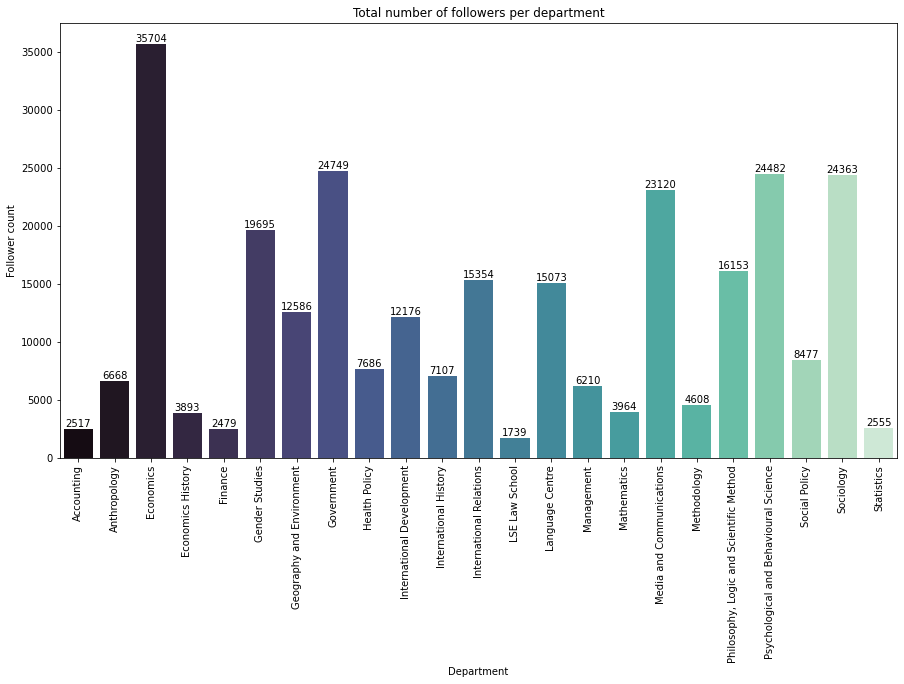

In [74]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Department', y = 'Follower count' , data =  dept_eng, palette = 'mako')
ax.bar_label(ax.containers[0])
ax.set_title('Total number of followers per department')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

The Economics department has the most followers which is to be expected since they're the largest department at the LSE. Following the Economics department, the Psychology, Sociology, Government, and Media department follows closely. The Accounting, Economics History, Finance, Law, Mathematics and Statistics departments have the lowest following count. Again, this is to be expected as these departments are relatively smaller. However, the only strange follower count is LSE Law School considering the size of the department.

Next, we can look at the engagement ratios to determine whether a high follower count necessarily means that a department is popular.

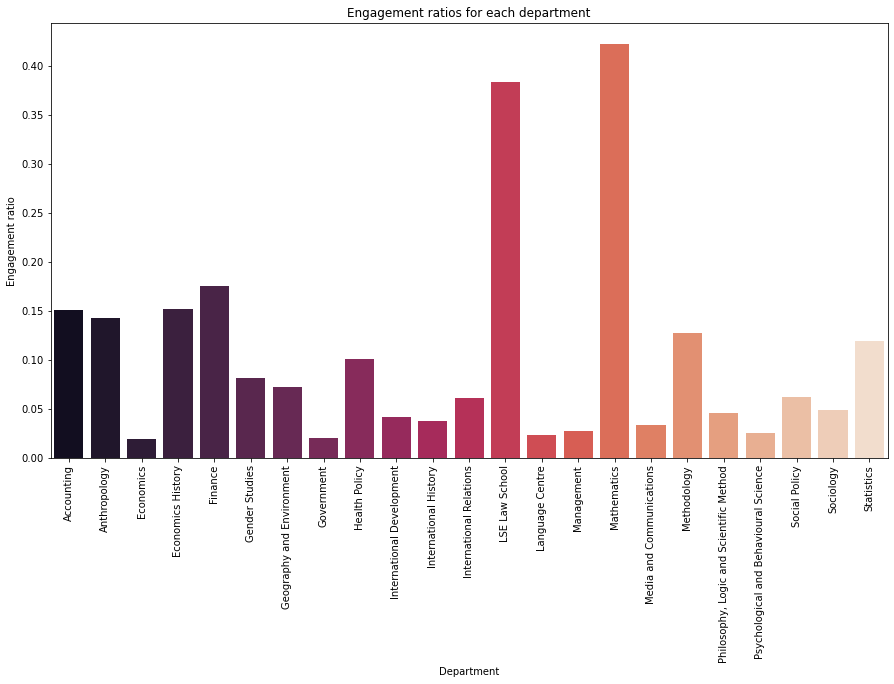

In [75]:
#Engagement ratios
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Department', y = 'Engagement ratio' , data =  dept_eng, palette = 'rocket')
ax.set_title('Engagement ratios for each department')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

Based on the second plot of the engagement ratios, there is a somewhat clear pattern. For starters, it seems that the departments with smaller following counts have higher engagement rates. For example, the LSE Law School and Mathematics department had the highest engagement ratio whereas the Economics department had a low engagement ratio despite its follower count. 

This observation could indicate that users are more interactive with departments with smaller accounts. It also indicates that a higher following count doesn't necessarily mean that the account is popular. Some other explanations for the observations above may include:
* Smaller departments have a tighter sense of community
* It is harder to maintain engagement with a larger following
* Larger department accounts may have many ghost followers

However, if we're looking at engagement ratios as a whole, they range from 0.01 to 0.4. None of the departments has an engagement ratio above 0.5. If we compare this value to general social media analytics, the engagement rates for each of the departments are quite high. The average is usually around 0.01 to 0.035.

#### Visualisation 2: Investigating engagements on a deeper level

From the previous section, we found out that engagement ratios tell us a lot more about an account's activity as opposed to a follower count. A good step forward would be to investigate what type of engagements, number of engagements and engagement sentiments each department is receiving. This further analysis could reveal a lot of information about what users are expecting from the department's Twitter accounts.

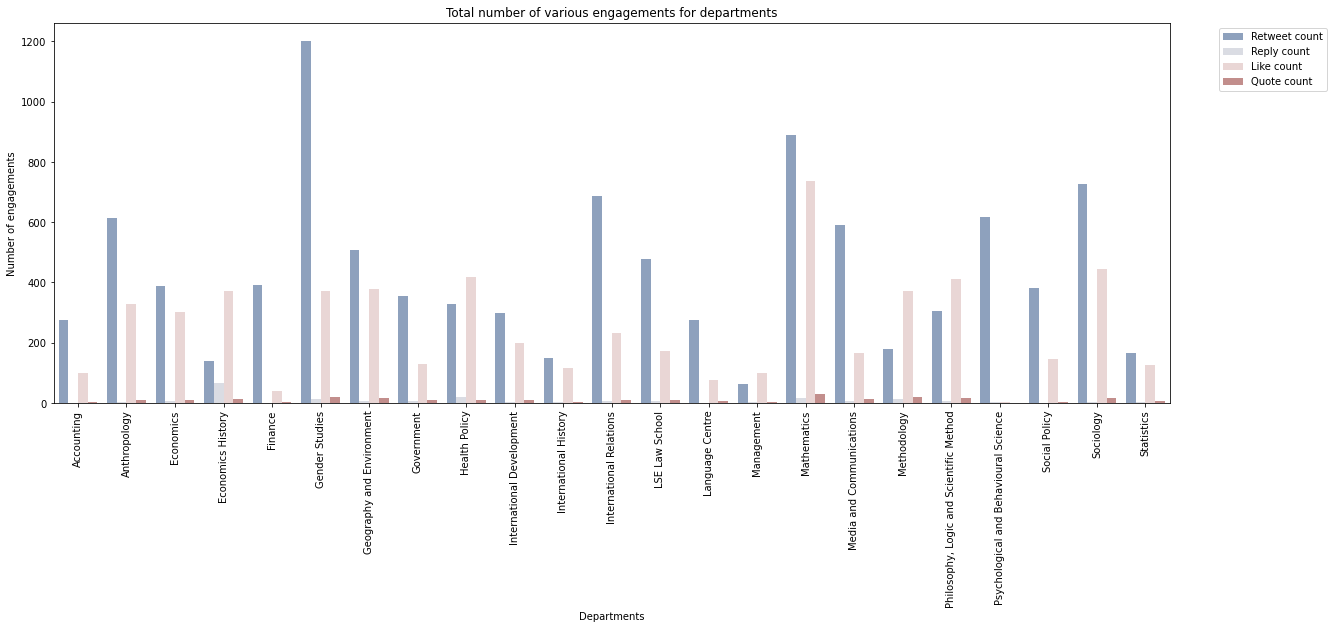

In [133]:
plt.figure(3,figsize=(20,7))
tweets_df_long = pd.melt(dept_eng.iloc[:,0:5].reset_index(), id_vars = 'Department', value_vars = dept_eng.iloc[:,1:5].columns,
       var_name = 'Engagement types', value_name = 'percentage')
sns.barplot(data = tweets_df_long, x = 'Department', y = 'percentage', hue = 'Engagement types', 
            palette = 'vlag')
plt.title('Total number of various engagements for departments')
plt.xlabel('Departments')
plt.ylabel('Number of engagements')
plt.legend(bbox_to_anchor= (1.04,1), loc = 'upper left')
plt.xticks(rotation = 90);

The bar chart above mostly tells us that most engagement on the LSE department's accounts come from retweets. But let's look at the engagement patterns of all types of engagements for each single tweet to see if there is anything worth noting.

In [199]:
import plotly.express as px
px.line(tweets_stats, x = 'Tweet no', y = 'Retweet count', hover_name = 'Department', 
        color = 'Department', width = 1000, height = 500,
       title = 'Retweet frequencies for department tweets')

In [198]:
px.line(tweets_stats, x = 'Tweet no', y = 'Reply count', hover_name = 'Department', 
        color = 'Department', width = 1000, height = 500,
       title = 'Reply frequencies for department tweets')

In [200]:
px.line(tweets_stats, x = 'Tweet no', y = 'Like count', hover_name = 'Department', 
        color = 'Department', width = 1000, height = 500,
       title = 'Like frequencies for department tweets')

In [201]:
px.line(tweets_stats, x = 'Tweet no', y = 'Quote count', hover_name = 'Department', 
        color = 'Department', width = 1000, height = 500,
       title = 'Quote frequencies for department tweets')

Overall, for all department accounts, the highest form of engagement is retweets, followed by likes, and lastly, both replies and quotes. This is an unusual observation as on social media, the highest number of engagements are usually likes. Apart from this, the plots also show that the replies on tweets are relatively constant, while the likes and quotes on the department's account can vary between larger ranges.

Since retweets are the highest form of engagement for all the accounts, this indicates that content on Twitter is often shared, and posts can be circulated to multiple users easily.

#### Visualisation 3: Investigating engagement sentiments
Next, we can look at the sentiments of mentions. Mentions of an account are the most interactive form of engagement on Twitter so it would be interesting to find out whether popular accounts are receiving positive, neutral, or negative mentions from the public.

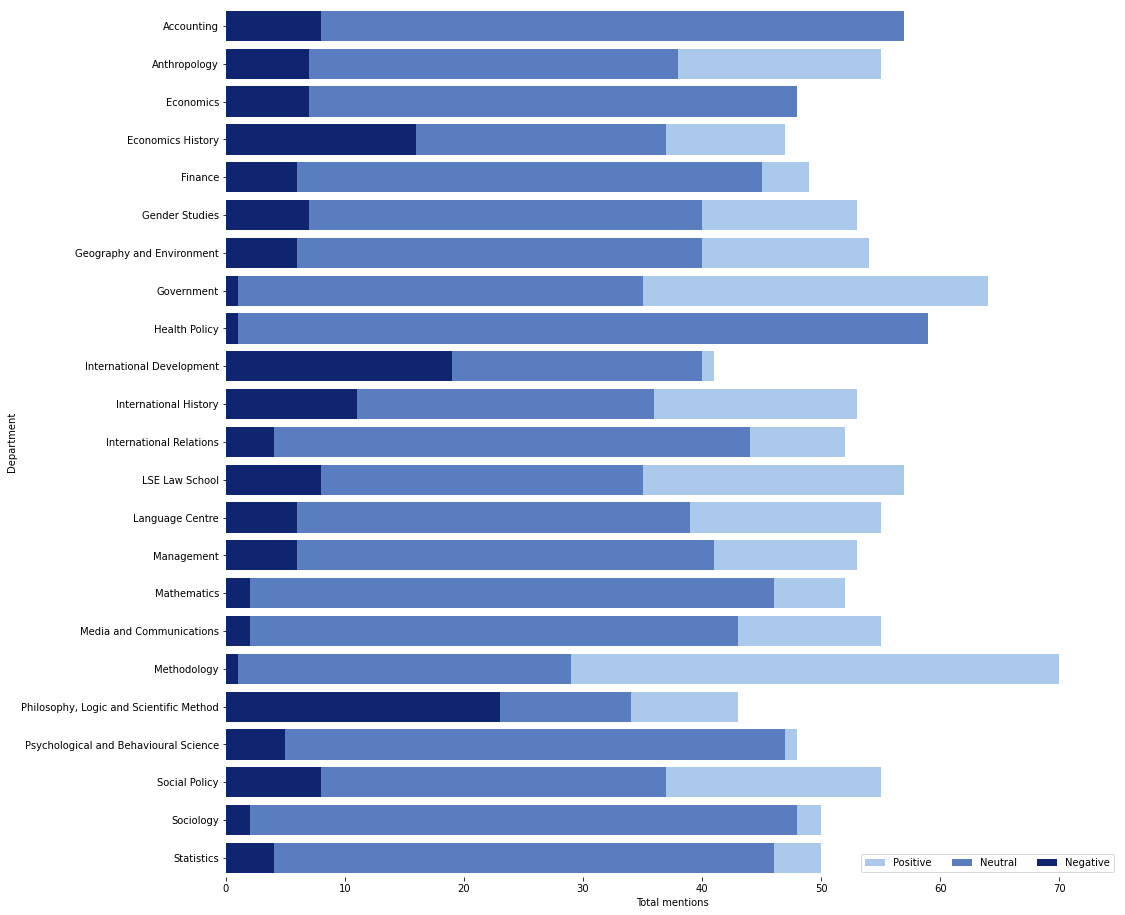

In [77]:
#Sentiments of mentions
f, ax = plt.subplots(figsize=(16, 16))

sns.set_color_codes('pastel')
sns.barplot(x = 'Positive mentions', y = 'Department', data = dept_eng,
            label = 'Positive', color = 'b')

sns.set_color_codes('muted')
sns.barplot(x = 'Neutral mentions', y = 'Department', data = dept_eng,
           label = 'Neutral', color = 'b')

sns.set_color_codes('dark')
sns.barplot(x = 'Negative mentions', y = 'Department', data = dept_eng,
           label = 'Negative', color = 'b')

ax.legend(ncol = 3, loc = 'lower right', frameon = True)
ax.set(xlim = (0, 75), ylabel = 'Department', xlabel = 'Total mentions')
sns.despine(left = True, bottom = True)

Based on the stacked bar plots, most departments have a generally high number of positive mentions, followed by neutral and negative mentions. It is worth noting that the Philosophy, International Development and Economics History departments have the most negative mentions. 

However, since I used TextBlob to classify the sentiment of these mentions, we also have to check these sentiments against the subjectivity of the tweet. For instance, if a tweet is classified to be negative, but has a high subjectivity score, this tweet could be interpreted in different ways depending on who's reading it.

In [193]:
px.scatter(mentions.iloc[:,[1,4,5]], x = 'Subjectivity', y = 'Polarity', 
           hover_name = 'Department', color = 'Department', width = 1000, height = 500, 
           title = 'Polarity to subjectivity for department tweets')

The scatterplot above shows some sort of pattern. The pattern shows that tweets with a higher subjectivity have a higher polarity score. However, tweets with a lower subjectivity score tend to have a polarity score closer to 0. This observation tells us that the tweets that were labelled positive are more opinionated. 

To conclude, even though most departments have positive tweets, we should also remember that these tweets are classified as positive because of the opinions in the tweet.

#### Visualisation 4: Investigating department categories
After some of the analysis above, I found it quite difficult to identify specific patterns for all 23 departments. So now, I'm looking into the possibility of classifying the departments under categories. Once the departments are split into categories, the analysis might give more interpretative results.

For the categories, we can split the departments into two classes. The two classes can be quantitative and qualitative departments. 

I'm hoping that splitting the departments into two categories can show specific patterns in the categories separately.

In [227]:
dept_categories = dept_eng

def cat(text):
    if text == 'Accounting':
        return 'Quantitative'
    elif text == 'Finance':
        return 'Quantitative'
    elif text == 'Mathematics':
        return 'Quantitative'
    elif text == 'Methodology':
        return 'Quantitative'
    elif text == 'Statistics':
        return 'Quantitative'
    else:
        return 'Qualitative'

In [228]:
dept_categories['Category'] = dept_categories['Department'].apply(cat)
dept_categories

,Department,Retweet count,Reply count,Like count,Quote count,Follower count,Tweet count,Total engagement,Engagement ratio,Mentions' subjectivity,Mentions' polarity,Positive mentions,Neutral mentions,Negative mentions,Category
0,Accounting,277,1,99,3,2517,495,380,0.150973,25.345229,11.531351,35,57,8,Quantitative
1,Anthropology,615,3,327,10,6668,907,955,0.143221,37.932471,19.215947,55,38,7,Qualitative
2,Economics,388,6,301,11,35704,10187,706,0.019774,25.528766,15.723992,45,48,7,Qualitative
3,Economics History,139,67,371,15,3893,1754,592,0.152068,28.256571,9.776995,47,37,16,Qualitative
4,Finance,390,1,40,3,2479,605,434,0.175071,32.508878,19.157927,49,45,6,Quantitative
5,Gender Studies,1202,13,371,20,19695,7229,1606,0.081544,37.265356,21.739402,53,40,7,Qualitative
6,Geography and Environment,508,8,377,17,12586,5331,910,0.072303,29.856180,15.598077,54,40,6,Qualitative
7,Government,355,7,131,9,24749,8668,502,0.020284,31.246480,24.824611,64,35,1,Qualitative
8,Health Policy,330,20,418,10,7686,4551,778,0.101223,24.644255,21.715429,40,59,1,Qualitative
9,International Development,299,5,199,9,12176,5739,512,0.042050,33.096135,11.178275,41,40,19,Qualitative


In [242]:
dept_cats = dept_categories.groupby('Category', as_index = False).sum()
dept_cats

,Category,Retweet count,Reply count,Like count,Quote count,Follower count,Tweet count,Total engagement,Engagement ratio,Mentions' subjectivity,Mentions' polarity,Positive mentions,Neutral mentions,Negative mentions
0,Qualitative,8106,173,4365,183,265235,99892,12827,1.383363,577.617539,329.635385,920,741,139
1,Quantitative,1902,39,1375,64,16123,9349,3380,0.994966,164.622624,97.135497,256,223,21


The table shows the data for quantitative and qualitative departments respectively. There is a huge disparity in the numbers because there are a lot more qualitative departments compared to quantitative ones at the LSE. Looking at the averages may be a better way to go.

In [243]:
dept_categories.groupby('Category', as_index = False).mean()

,Category,Retweet count,Reply count,Like count,Quote count,Follower count,Tweet count,Total engagement,Engagement ratio,Mentions' subjectivity,Mentions' polarity,Positive mentions,Neutral mentions,Negative mentions
0,Qualitative,450.333333,9.611111,242.5,10.166667,14735.277778,5549.555556,712.611111,0.076853,32.089863,18.313077,51.111111,41.166667,7.722222
1,Quantitative,380.400000,7.800000,275.0,12.800000,3224.600000,1869.800000,676.000000,0.198993,32.924525,19.427099,51.200000,44.600000,4.200000


Now we find that on average, qualitative departments have higher retweets and replies, but quantitative departments have a higher number of likes and quotes per tweet. And similar to the observations earlier, the quantitative departments have fewer followers, but a higher engagement ratio. 

#### Visualisation 5: Identifying the patterns of the users that actively interact with each department's accounts
Now that we've analysed all the data above, we can attempt to find out whether the users who often mention the department have a relationship with other departments. We can start visualising this using a NetworkX graph.

In [220]:
#NetworkX graph of users who mention departments
import networkx as nx
import matplotlib.pyplot as plt

g = nx.Graph()

In [221]:
for i in range(0, len(mentions)):
    g.add_edge(mentions['User ID'][i], mentions['Department'][i])

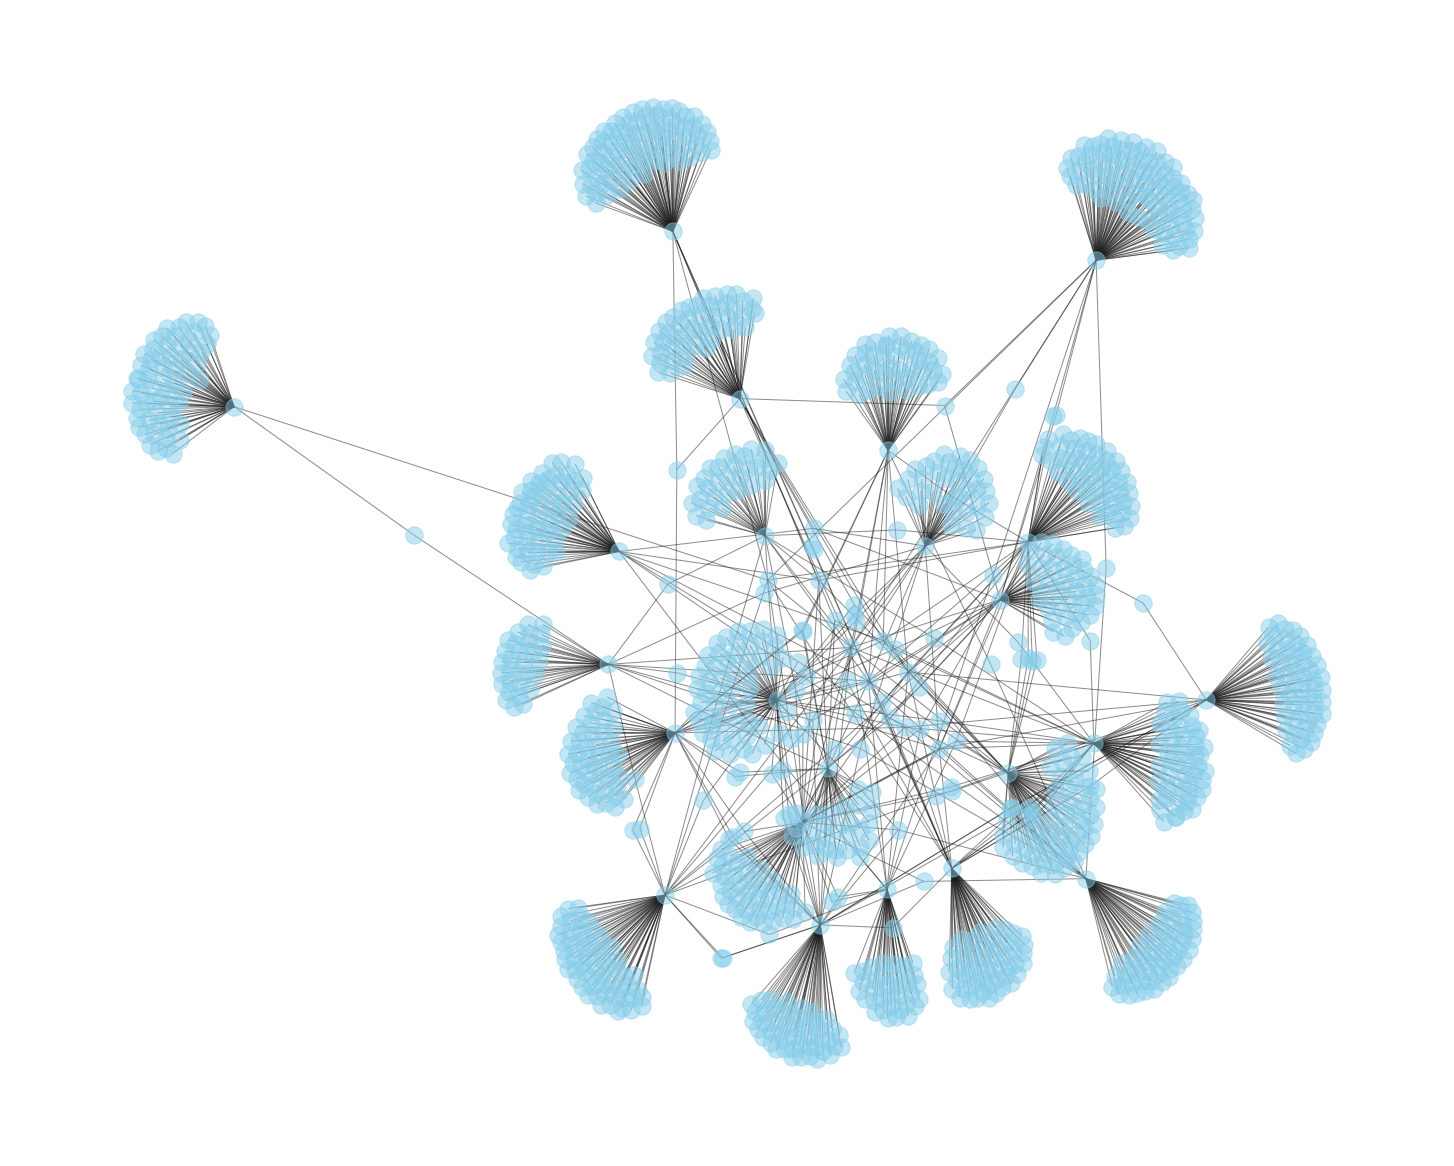

In [222]:
plt.figure(3,figsize=(20,16))
nx.draw(g, with_labels = False, node_color = 'skyblue',
       node_shape = 'o', alpha = 0.5)
plt.show()

From the graph created above, these are a few features I have noticed:
1. Department accounts have specialised audiences 
2. Some departments are more connected to other departments
3. The main users who mention the departments are not other departments


For the first observation, the graph shows that many users only mention one department account as opposed to many. This pattern could explain the types of audience for each account. It is likely that only students from that particular department only interact with the department they're from. 

In the second observation, we can see that some departments only interact with two or three other departments. This could indicate that there isn't a strong connection between all the departments on Twitter. This reason could also be why audiences are more specialised. For instance, if departments were actively sharing each other's content, their audiences would likely merge more and be bigger. 

The last observation, it expands again on the second observation. When the department accounts get mentioned, most of the time, it is by a user who isn't one of the other LSE departments. This only further reinforces the other points above.

To conclude this visualisation, departments that mention each other tend to have a bigger audience. However, most departments have a niche audience. This niche audience means that users only interact with one department. This also tells us that most interactions from users are only from students in that particular department. Building on that, the departments can expand their account reach if they interacted with other departments as well. 

### Part 4: Conclusion

2. Does Twitter have an active audience that's worth maintaining?
4. Does a department need positive attention to be successful? Or can negative attention make the account successful too?

To conclude this entire project, we have to circle back to the questions we wanted to answer in the introduction. To decide whether Twitter is an effective social media platform, we need to find out how successful the LSE departments on Twitter are. A successful Twitter account includes several factors. An outstanding account will have high engagement ratios concerning its target audience. Typically, accounts can become successful by creating a variety of content that is catered to their audience.

Point 2

From the data analysis, it seems that growing as an account on Twitter seems doable. Tweets are often shared on Twitter. For instance, we found that the retweet count is the highest form of engagement for all department's accounts. In addition to this, when we explored the connections between the users who mention each department, we found that departments that interacted with each other had an even larger reach. This tells us that it should be decently easy to grow an account on Twitter.

Point 4

As a whole, Twitter seems like a good social media platform to use. However, before we can completely give the recommendation to use Twitter, we should look at the limitations. The analysis only included the last 100 tweets. A more in-depth analysis would include tweets dating back to the start of each department's account. The next limitation is that I couldn't carry out an analysis on other social media platforms like Facebook and Instagram. Using three platforms to analyse would give a better comparison.

In conclusion, Twitter is a good social media platform to use based on this analysis alone. 

### Part 5: References

1. TextBlob for sentiment classification: https://textblob.readthedocs.io/en/dev/